In [1]:
import pandas as pd
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.layers import LSTM
import matplotlib.pyplot as plt
import numpy as np
#Disable GPU
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

In [2]:
df = pd.read_csv("data.csv")
df["date"] = pd.to_datetime(df["date"])
df.set_index("date", inplace = True, drop=True)

In [3]:
data= df["Cumulative_solar_power"].diff()
data = data[data.index > "2012"]
data = dn = np.reshape(data.values, (-1, 1))

In [4]:
n_input  = 3
generator = TimeseriesGenerator(data, data, length=n_input, batch_size=1)

In [15]:
model = Sequential()
model.add(LSTM(128, input_shape=(n_input,1)))
model.add(Dense(64))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 128)               66560     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 74,881
Trainable params: 74,881
Non-trainable params: 0
_________________________________________________________________


In [17]:
history = model.fit(generator, epochs = 75, verbose=1)

Epoch 1/75
3233/3233 [==============================] - 6s 1ms/step - loss: 29.9925
Epoch 2/75
3233/3233 [==============================] - 5s 2ms/step - loss: 24.8280
Epoch 3/75
3233/3233 [==============================] - 5s 1ms/step - loss: 26.8789
Epoch 4/75
3233/3233 [==============================] - 5s 1ms/step - loss: 25.3376
Epoch 5/75
3233/3233 [==============================] - 5s 1ms/step - loss: 24.5661
Epoch 6/75
3233/3233 [==============================] - 5s 2ms/step - loss: 24.6156
Epoch 7/75
3233/3233 [==============================] - 5s 2ms/step - loss: 24.4897
Epoch 8/75
3233/3233 [==============================] - 5s 2ms/step - loss: 25.6949
Epoch 9/75
3233/3233 [==============================] - 5s 2ms/step - loss: 25.8240
Epoch 10/75
3233/3233 [==============================] - 5s 2ms/step - loss: 25.2417
Epoch 11/75
3233/3233 [==============================] - 5s 2ms/step - loss: 25.0995
Epoch 12/75
3233/3233 [==============================] - 5s 2ms/step - los

In [18]:
history.history["loss"]

[27.800987243652344,
 25.964405059814453,
 25.690349578857422,
 25.413846969604492,
 25.441434860229492,
 25.227994918823242,
 25.113367080688477,
 24.763229370117188,
 25.034650802612305,
 25.131072998046875,
 24.689714431762695,
 25.082738876342773,
 24.8690242767334,
 24.616985321044922,
 24.73719024658203,
 24.6811466217041,
 24.729320526123047,
 24.66241455078125,
 24.57948875427246,
 24.570043563842773,
 24.57377815246582,
 24.709226608276367,
 24.504291534423828,
 24.305866241455078,
 24.416296005249023,
 24.225637435913086,
 24.46217155456543,
 24.43552589416504,
 24.184375762939453,
 24.358243942260742,
 24.287403106689453,
 24.293649673461914,
 24.227439880371094,
 24.182111740112305,
 24.261795043945312,
 24.19865608215332,
 24.17484474182129,
 23.988740921020508,
 24.14134979248047,
 24.06600570678711,
 24.00432014465332,
 24.200740814208984,
 24.06810188293457,
 24.076751708984375,
 23.93145179748535,
 24.052642822265625,
 24.135574340820312,
 23.984960556030273,
 24.03639

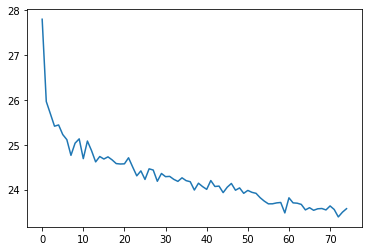

In [19]:
plt.plot(history.history["loss"])